# Aim

The goal is to reproduce the same cluster search analysis method as present in IVAS. The order in which I tend to do this analysis is:
1. Nearest Neighbour distribution - plots cluster count vs d-pair [nm] What's d-pair? It let's us estimate the order parameter which allows selecting as many real clusters over non-real by comparing it to the randomised (relabelled) data.
2. Cluster Size distribution - plots cluster count and size of each cluster for identified clusters and non-real clusters. From this figure we can estimate the $N_{min}$ parameter so that it cuts of random ones and shows us (mostly) the real ones.  
3. Cluster Count distribution - plots cluster count for each $d_{max}$ and compares it to relabelled data. This allows more appropriate $d_{max}$ selection.

The last step in IVAS, Cluster Analysis, is not included in this notebook. These functions are aiming for the most appropriate parameter selection though.

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from posgenpy import write_cluster_xml
import osimport sys

Change the working directory to make things simple, assuming pos and range files are already there

In [2]:
print(os.getcwd())

C:\Users\Andy\Documents\python\PycharmProjects\posgenpy


In [3]:
os.chdir("C:\\Users\\Peter\\OneDrive - Nexus365\\Misc\\170710-posgen")
print(os.getcwd())

C:\cygwin64\home\Andy\posgen


## Creating XML file
Let's check if Andy's code for cluster search works.

In [4]:
# my inputs 
xml_file = "cluster_check.xml"
pos_file =  "R5083_09569-v08-roi_noOx.pos"
rrng_file = "R5083_09569-v08_noOx.rrng"
core_ions = ["Ni", "Mn", "Si", "Cu", "P", "Fm"]
bulk_ions = ["Fe", "C", "Cr", "O"]
Nmin=20

In [5]:
andys_output = write_cluster_xml(xml_file, pos_file, rrng_file, core_ions, bulk_ions, 
                               mass_random_relabel=False, 
                               nmin=str(Nmin), dbulk="0.25", derode="0.25")

## Running POSGEN 
So to simplify things at the beginning I moved these files into posgen folder so that I can run them without typical Windows path issues. Now it's the time to run it from here.

In [6]:
import subprocess

In [7]:
posgen_output = subprocess.call(["posgen", "cluster_check.xml"])

In [8]:
if posgen_output == 0:
    print("Success")

Success


## Plotting the results
Find the files with recent results and plot them.

In [9]:
# size distribution
# TODO change pandas into my own functions to read the stat files
import pandas


In [10]:
size_distribution = pandas.read_csv("sizedist.txt", sep='\t')

In [11]:
size_distribution.head()

,Cluster Size(core),Frequency
0,20,3
1,21,4
2,22,1
3,23,1
4,24,2


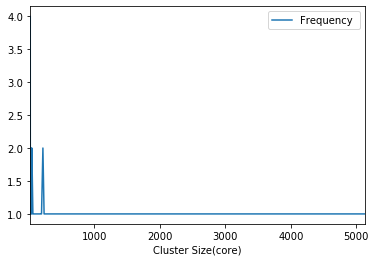

In [12]:
size_distribution.plot(x="Cluster Size(core)", y="Frequency ")

(0, 4.15)

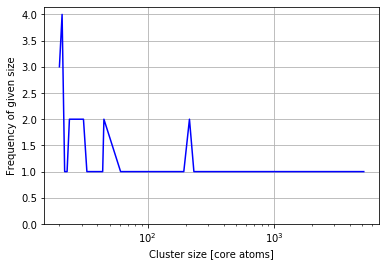

In [13]:
# more readable format:
sizes = size_distribution["Cluster Size(core)"]
frequencies = size_distribution["Frequency "]

plt.semilogx(sizes, frequencies, 'b-')
plt.ylabel("Frequency of given size")
plt.xlabel("Cluster size [core atoms]")
plt.grid()
plt.ylim(bottom=0)

Text(0.5, 0, 'Cluster size in core ions')

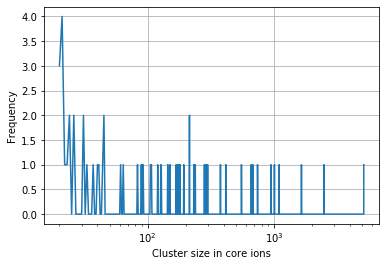

In [14]:
# to include cluster sizes with no frequencies
a = frequencies.values.flatten()
b = sizes.values.flatten()

real_sizes = np.arange(min(b), max(b)+1, 1)
real_frequencies = np.zeros(max(b)-min(b)+1)

real_frequencies[b-min(b)] = a

plt.semilogx(real_sizes, real_frequencies)
plt.grid()
plt.ylabel("Frequency")
plt.xlabel("Cluster size in core ions")

## Further analysis of the data
I'm not going to plot anything else now. Sweep functions are needed to get the plots similar to IVAS.

## Getting truly random cluster searches
In order to get truly random cluster searches to compare them to non-random ones, I will iterate through the same function 5 times.

In [15]:
# create a folder for dropping all the random files in
RANDOM_FILES_DIR="random_files"
try:
    os.mkdir(RANDOM_FILES_DIR)
except FileExistsError:
    print("Directory " + str(os.getcwd()) + os.sep + RANDOM_FILES_DIR + " already exists - please delete")
    sys.exit(1)

In [16]:
# running relabelled cluster search

random_search = write_cluster_xml("relabelled_cluster_check.xml", pos_file=pos_file, range_file=rrng_file, core_ions=core_ions, 
                               bulk_ions=bulk_ions, 
                               mass_random_relabel=True, 
                               nmin=str(Nmin), dmax="1", dbulk="0", derode="0",
                               clusterstats_file="random_files/cluster-stats.txt",
                               unclusterstats_file="random_files/uncluster",
                               sizedist_file="random_files/sizedist.txt", 
                               include_unranged_pos=False,
                               include_unranged_stats=True,
                               clusterstats_core=True,
                               clusterstats_bulk=True,
                               clusterstats_percluster=True,
                               clustered_pos_file="",
                               unclustered_pos_file="",
                               clusterid_pos_file="")

In [17]:
random_call = subprocess.call(["posgen", "relabelled_cluster_check.xml"])

if random_call == 0:
    print("Success")

Success


Iterate through this function several times and create randomised data in the designated folder.

In [19]:
random_folder = "random_files"
number_of_iterations = 3

In [30]:
for run in range(number_of_iterations):
    
    # TODO all of these parameters will be changeable from outside of the function (class?)
    random_search = write_cluster_xml(f"{random_folder}/relabelled_cluster_check{run+1}.xml", 
                                    pos_file=pos_file, range_file=rrng_file, core_ions=core_ions, 
                                   bulk_ions=bulk_ions, 
                                   mass_random_relabel=True, 
                                   nmin="5", dmax = "1", dbulk="0", derode="0",
                                   clusterstats_file=f"{random_folder}/cluster-stats{run+1}.txt",
                                   unclusterstats_file=f"{random_folder}/uncluster{run+1}.pos",
                                   sizedist_file=f"{random_folder}/sizedist{run+1}.txt", 
                                   include_unranged_pos=False,
                                   include_unranged_stats=True,
                                   clusterstats_core=True,
                                   clusterstats_bulk=True,
                                   clusterstats_percluster=True,
                                   clustered_pos_file="",
                                   unclustered_pos_file="",
                                   clusterid_pos_file="")

In [31]:
# iterate through posgen calls
for run in range(number_of_iterations):
    loc_output = subprocess.call(["posgen", f"{random_folder}\\relabelled_cluster_check{run+1}.xml"])
    if loc_output == 0:
        print(f"Run {run+1} finished")

Run 1 finished
Run 2 finished
Run 3 finished
Run 4 finished
Run 5 finished
Run 6 finished
Run 7 finished
Run 8 finished
Run 9 finished
Run 10 finished
Run 11 finished
Run 12 finished
Run 13 finished
Run 14 finished
Run 15 finished
Run 16 finished
Run 17 finished
Run 18 finished
Run 19 finished
Run 20 finished


## Retrieving random data
Get random data and plot to compare with real values. Then, take an average and plot with errorbars.

In [32]:
# create pandas dataframes for each
dfs = []
for run in range(number_of_iterations):
    dfs.append(pandas.read_csv(f"{random_folder}/sizedist{run+1}.txt", sep='\t'))


In [33]:
dfs

[    Cluster Size(core)  Frequency 
 0                    5         292
 1                    6         161
 2                    7          82
 3                    8          34
 4                    9          24
 5                   10          20
 6                   11           9
 7                   12           6
 8                   13           2
 9                   14           4
 10                  15           4
 11                  18           2
 12                  20           2,     Cluster Size(core)  Frequency 
 0                    5         266
 1                    6         155
 2                    7          88
 3                    8          50
 4                    9          26
 5                   10          17
 6                   11           9
 7                   12           8
 8                   13           1
 9                   14          10
 10                  15           3
 11                  16           1
 12                  17     

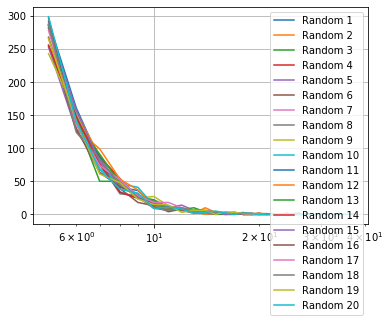

In [51]:
all_frequencies = []

# FIXME: bug when no random clusters are found

for i, run in enumerate(dfs):
    loc_label = f"Random {i+1}"
    sizes = run["Cluster Size(core)"].values.flatten()
    frequencies = run["Frequency "].values.flatten()
    
    new_sizes = np.arange(min(sizes), max(sizes)+1, 1)
    new_frequencies = np.zeros(max(sizes)-min(sizes)+1)

    new_frequencies[sizes-min(sizes)] = frequencies
    
    all_frequencies.append(new_frequencies)

    plt.semilogx(new_sizes, new_frequencies, label=loc_label)

plt.legend(loc=1)
plt.grid()

In [35]:
# print(all_frequencies)

max_length = 0
for x in all_frequencies:
    if len(x) > max_length:
        max_length = len(x)
print(max_length)

33


In [36]:
min_length = max_length
for x in all_frequencies:
    if len(x) < min_length:
        min_length = len(x)
print(min_length)

13


In [37]:
trimmed_data = []
for i in range(number_of_iterations):
    trimmed_data.append(all_frequencies[i][:min_length])

In [38]:
trimmed_np = np.array([trimmed_data[0], trimmed_data[1], trimmed_data[2]])
trimmed_np

array([[292., 161.,  82.,  34.,  24.,  20.,   9.,   6.,   2.,   4.,   4.,
          0.,   0.],
       [266., 155.,  88.,  50.,  26.,  17.,   9.,   8.,   1.,  10.,   3.,
          1.,   2.],
       [255., 142.,  50.,  50.,  27.,  22.,  11.,   9.,   6.,   3.,   2.,
          1.,   1.]])

In [39]:
relabelled_frequencies_averaged = np.average(trimmed_np, axis=0)
relabelled_frequencies_averaged
len(relabelled_frequencies_averaged)

13

In [40]:
st_deviation = np.std(trimmed_np, axis=0)
st_deviation

array([15.51343504,  7.9302515 , 16.67999467,  7.54247233,  1.24721913,
        2.05480467,  0.94280904,  1.24721913,  2.1602469 ,  3.09120617,
        0.81649658,  0.47140452,  0.81649658])

In [41]:
size_axis_for_average = np.arange(Nmin, len(relabelled_frequencies_averaged)+Nmin)

(15.15539161685442, 6772.507276278716, 0, 20)

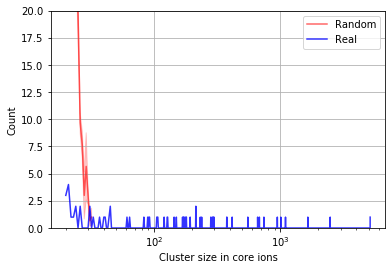

In [49]:
# plot average random cluster size distribution with st_dev 
plt.semilogx(size_axis_for_average, relabelled_frequencies_averaged, "r-",label="Random", alpha=0.6)
plt.fill_between(size_axis_for_average, alpha=0.2, color="red",
                 y1=relabelled_frequencies_averaged+st_deviation, 
                 y2=relabelled_frequencies_averaged-st_deviation)

# on top of it, plot the real values
plt.semilogx(real_sizes, real_frequencies, 'b-', alpha=0.8, label="Real")

plt.xlabel("Cluster size in core ions")
plt.ylabel("Count")
plt.legend(loc=1)
plt.grid()

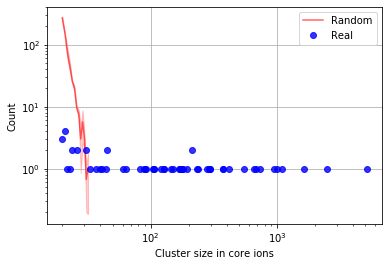

In [53]:
# plot average random cluster size distribution with st_dev 
plt.loglog(size_axis_for_average, relabelled_frequencies_averaged, "r-",label="Random", alpha=0.6)
plt.fill_between(size_axis_for_average, alpha=0.2, color="red",
                 y1=relabelled_frequencies_averaged+st_deviation, 
                 y2=relabelled_frequencies_averaged-st_deviation)

# on top of it, plot the real values
plt.loglog(real_sizes, real_frequencies, 'bo', alpha=0.8, label="Real")

plt.xlabel("Cluster size in core ions")
plt.ylabel("Count")
plt.legend(loc=1)
plt.grid()

## Future work

1. Relabelling feature needs to be adjusted to each cluster search type. It should be a feature of each function, not a separate task.
2. XML file for relabelled cluster searches needs to be optimised so that no unnecessary files are produced.
3. To save disk space, unecessary files should be deleted after the search.
4. Visualising spatial distribution (or any real vs random data sets) requires interactive windows for zooming to the regions of interest. Otherwise it's not readable.
5. More work on using whatever file path the user wants is required. Many problems with Windows backslash. Using WSL might solve this.